# UK Road Safety - Police presence prediction model
Arun Aryasomayajula, 8/2/2020, Albuquerque, New Mexico.


The instructions for this technical exercise from h2o.ai are listed below. I would try my best to adhere to these in this current notebook.
    Instructions:
    1.	Use the dataset (DfTRoadSafety_Accidents_2014.csv) or download it from the https://data.gov.uk/dataset/road-accidents-safety-data
2.	Build a model that predicts if a police officer is likely to attend an accident or not. The variable’s name is Did_Police_Officer_Attend_Scene_of_Accident. There is a dictionary that explains all the features included in the dataset called Road-Accident-Safety-Data-Guide.xls.
3.	Produce a report that summarises your findings. Things to Include in the report:
a.	Describe the features and the target included in the dataset. What insight did you gain from working with the data?
b.	Explain how you transformed the features 
c.	The validation approach taken
d.	Which performance metrics did you use and why?
e.	Which algorithms did you use?
f.	Which were the most important features?
g.	How useful is the model from a practical point of view?
h.	What might you do differently if you had more time/resource?
4.	This is not meant to be an exercise to develop a ‘final solution’ but more a first pass, to understand how you would approach this kind of exercise: Suggested time breakdown:
a.	3-4 hours getting data and building model
b.	1 hour creating the report/presentation
5.	Submit the report and any source code (these may be part of the same document if you are working with e.g. jupyter notebook).

So here goes nothing!! :)

In [76]:
#import packages to be used for graphics/statistics/other useful toolboxes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
#read dataset for the problem as saved within your folder
uk_accidents_df = pd.read_csv('./input/DfTRoadSafety_Accidents_2014.csv')

In [78]:
#check top rows in the dataset
uk_accidents_df.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,...,0,0,1,2,2,0,0,1,2,E01002814
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,...,0,5,7,1,1,0,0,1,2,E01002894
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,...,0,0,1,1,1,0,0,1,1,E01002822
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,...,0,1,4,1,1,0,0,1,2,E01002812
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,...,0,8,1,1,1,0,0,1,1,E01002821


In [79]:
#check te column names in the dataset
uk_accidents_df.columns


Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [80]:
# Check out columns datatypes, stats and descriptions in the dataset
uk_accidents_df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,146322.000000,1.463220e+05,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.00000,146322.000000,...,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000
mean,447029.362475,2.903741e+05,-1.328712,52.500882,29.895839,2.836033,1.835179,1.329103,4.09868,343.380537,...,377.446023,0.008386,0.857725,1.924099,1.500595,1.328132,0.096985,0.069135,1.341951,1.182577
std,95158.326674,1.578227e+05,1.397358,1.421337,25.190838,0.399682,0.700208,0.857469,1.91668,258.280727,...,1288.061037,0.119877,1.947539,1.627001,1.514131,0.568551,0.685515,0.612831,0.474365,0.386320
min,70951.000000,1.030400e+04,-7.450342,49.913077,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,-1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,384364.250000,1.765900e+05,-2.235527,51.474928,6.000000,3.000000,1.000000,1.000000,2.00000,104.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,451306.000000,2.416200e+05,-1.238819,52.055123,30.000000,3.000000,2.000000,1.000000,4.00000,323.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,526830.000000,3.911760e+05,-0.170586,53.414623,45.000000,3.000000,2.000000,1.000000,6.00000,517.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655309.000000,1.190858e+06,1.758797,60.597984,98.000000,3.000000,21.000000,93.000000,7.00000,941.000000,...,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,2.000000


In [81]:
## Missing data in teh dataset
total = uk_accidents_df.isnull().sum().sort_values(ascending=False)
percent = (uk_accidents_df.isnull().sum()/uk_accidents_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LSOA_of_Accident_Location,9277,0.063401
Did_Police_Officer_Attend_Scene_of_Accident,0,0.000000
Location_Easting_OSGR,0,0.000000
Location_Northing_OSGR,0,0.000000
Longitude,0,0.000000
Latitude,0,0.000000
Police_Force,0,0.000000
Accident_Severity,0,0.000000
Number_of_Vehicles,0,0.000000
Number_of_Casualties,0,0.000000


This dataset is remarkably complete and has almost no important information missing. Only the LSOA of accident location is missing for about 9,277 entries which corresponds to abut 0.06% of the rows.

# What does the dataset contain? Variables, Target etc.

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

I was provided with an Excel spreadsheet named "Road-Accident-Safety-Data-Guide.xls" which describes each variable in our list above.

I have determined that apart from a few variable like latitude/longitude and number of vehicles/number of casualties, all other variables are either identifying, geographical or categorical/factor variables.

Identifying_variables->'Accident_Index', 'LSOA_of_Accident_Location'

Geographical_variables -> 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude'
       
Categorical_variables ->  'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area' 
 
Target_variable -> 'Did_Police_Officer_Attend_Scene_of_Accident'. This is the target variable for arguably a binary        
                    classification problem.
       

After this exercise, I went through this process and concluded that the following variables can play an important role in this problem:



# Analyzing the target variable 

'Did_Police_Officer_Attend_Scene_of_Accident' is the target variable which is a binary outcome. From the accompanying data dictionary we find:

'1' means	Yes
'2' means	No

Once we know this we can check for variable distributions w.r.t the target variable and see if there is any discernible difference i.e. variance explained by the predictor variables against the target variable.

In [82]:
#descriptive statistics summary
uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].describe()
uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident']=uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].astype('category')
uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].describe()

count     146322
unique         2
top            1
freq      119607
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

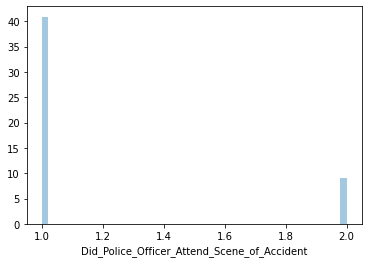

In [83]:
## It seems the dataframe has a total of 146,322 accidents recorded. Out of which a policeman attended 119,607 which
#is 119,607/146,322 = 81.74%
#histogram
sns.distplot(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident']);

### Relationship with numerical variables

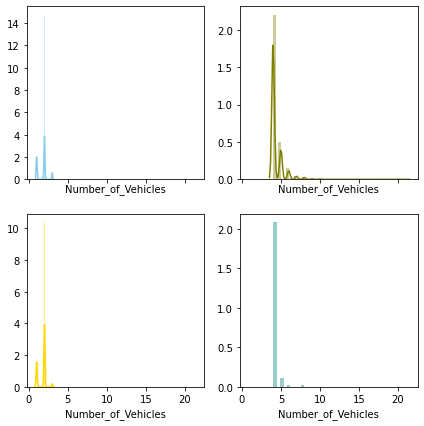

In [86]:
#scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

var = "Number_of_Vehicles"
data_1 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 1)&(uk_accidents_df[var]<=3.0)]
data_2 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 1)&(uk_accidents_df[var]>3.0)]
data_3 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 2)&(uk_accidents_df[var]<=3.0)]
data_4 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 2)&(uk_accidents_df[var]>3.0)]

# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( data_1[var] , color="skyblue", ax=axes[0, 0])
sns.distplot( data_2[var] , color="olive", ax=axes[0, 1])
sns.distplot( data_3[var] , color="gold", ax=axes[1, 0])
sns.distplot( data_4[var] , color="teal", ax=axes[1, 1])

*It seems that "Number_of_vehicles" have no discernible difference in distribution for accidents where a police officer analyzed. Police officer seem to have analyzed situation more when there were > 2 vehicles involved.

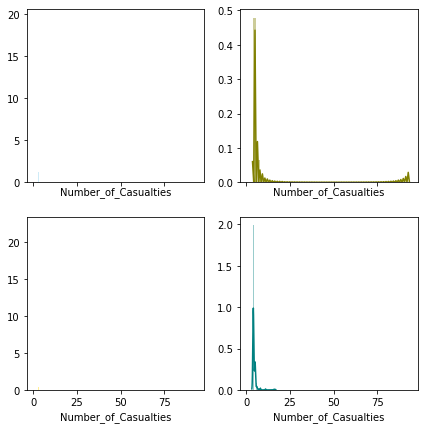

In [87]:
#scatter plot 
var = "Number_of_Casualties"
data_1 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 1)&(uk_accidents_df[var]<=3.0)]
data_2 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 1)&(uk_accidents_df[var]>3.0)]
data_3 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 2)&(uk_accidents_df[var]<=3.0)]
data_4 = uk_accidents_df.loc[(uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'] == 2)&(uk_accidents_df[var]>3.0)]

# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( data_1[var] , color="skyblue", ax=axes[0, 0])
sns.distplot( data_2[var] , color="olive", ax=axes[0, 1])
sns.distplot( data_3[var] , color="gold", ax=axes[1, 0])
sns.distplot( data_4[var] , color="teal", ax=axes[1, 1])

*There is no discernible difference in the distributions.

Lets start building dataset for Training/Testing and model building!

In [3]:
## Import h2o and then initialize h2o cluster
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\aruna\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\aruna\AppData\Local\Temp\tmpohrye91d
  JVM stdout: C:\Users\aruna\AppData\Local\Temp\tmpohrye91d\h2o_aruna_started_from_python.out
  JVM stderr: C:\Users\aruna\AppData\Local\Temp\tmpohrye91d\h2o_aruna_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_aruna_oq85io
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [24]:
## Reading the model data into an h2o dataframe.
uk_accidents_df = h2o.import_file("./input/DfTRoadSafety_Accidents_2014.csv")
## Converted the target variable into a factor as most binary classification algorithms require this.
uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident']=uk_accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].asfactor()
## Splitting the accidents dataframe into 80/20 split randomly
acc_split = uk_accidents_df.split_frame(ratios = [0.8], seed = 1234)
acc_train = acc_split[0] # using 80% for training
acc_test = acc_split[1] #rest 20% for testing
print(acc_train.shape, acc_test.shape)

Parse progress: |█████████████████████████████████████████████████████████| 100%
(117143, 32) (29180, 32)


In [59]:
## Create a list of predictor variables
predictors = list(acc_train.columns) 
predictors.remove('Did_Police_Officer_Attend_Scene_of_Accident')  # Since that's the target variable
#Remove any variables which seem identity variables or provide a chance for overfitting.
remove_list = ['ÃƒÆ’Ã‚Â¯Ãƒâ€šÃ‚Â»Ãƒâ€šÃ‚Â¿Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','Time',
 'Local_Authority_(District)','Local_Authority_(Highway)','Police_Force','Date']
for i in remove_list: 
    try: 
        predictors.remove(i) 
    except ValueError: 
        pass
predictors

['Longitude',
 'Latitude',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area']

# We will fit a GLM model and sort of benchmark our predictive accuracy. 

We will use a 5- fold cross-validation approach with a stratification on target variable. This aleviates over-fitting and helps generalize the model better.

In [60]:
# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# Set up GLM for regression
acc_glm = H2OGeneralizedLinearEstimator(family = 'binomial', model_id = 'glm1', nfolds = 5, fold_assignment = "Stratified")
# Use .train() to build the model
acc_glm.train(x = predictors, 
                  y = 'Did_Police_Officer_Attend_Scene_of_Accident', 
                  training_frame = acc_train)
print(acc_glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.21E-4 )",22,22,4,py_6_sid_b72a




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13844747100078947
RMSE: 0.37208530070507956
LogLoss: 0.4382987658862916
Null degrees of freedom: 117141
Residual degrees of freedom: 117119
Null deviance: 111021.42668358891
Residual deviance: 102686.38806690394
AIC: 102732.38806690394
AUC: 0.6869904253065939
AUCPR: 0.32087392619629745
Gini: 0.37398085061318787

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18294867009720486: 


,,1,2,Error,Rate
0,1,53484.0,42380.0,0.4421,(42380.0/95864.0)
1,2,6135.0,15143.0,0.2883,(6135.0/21278.0)
2,Total,59619.0,57523.0,0.4142,(48515.0/117142.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.182949,0.384335,236.0
1,max f2,0.108520,0.566926,306.0
2,max f0point5,0.277630,0.331225,145.0
3,max accuracy,0.504062,0.820850,44.0
4,max precision,0.853101,1.000000,0.0
5,max recall,0.001367,1.000000,399.0
6,max specificity,0.853101,1.000000,0.0
7,max absolute_mcc,0.178027,0.207924,240.0
8,max min_per_class_accuracy,0.205598,0.628056,215.0
9,max mean_per_class_accuracy,0.179201,0.634814,239.0



Gains/Lift Table: Avg response rate: 18.16 %, avg score: 18.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,4.804767e-01,3.424378,3.424378,0.622014,0.562081,0.622014,0.562081,0.034261,0.034261,242.437838,242.437838,0.029640
1,2,0.020001,3.903307e-01,2.242556,2.833719,0.407344,0.426804,0.514725,0.494471,0.022418,0.056678,124.255609,183.371944,0.044818
2,3,0.030006,3.613378e-01,1.982288,2.549828,0.360068,0.373898,0.463158,0.454268,0.019833,0.076511,98.228762,154.982809,0.056827
3,4,0.040003,3.456400e-01,1.744210,2.348510,0.316823,0.353348,0.426590,0.429049,0.017436,0.093947,74.421029,134.850960,0.065918
4,5,0.050008,3.328870e-01,1.756814,2.230130,0.319113,0.339038,0.405087,0.411041,0.017577,0.111524,75.681415,123.013011,0.075170
5,6,0.100007,3.022932e-01,1.802832,2.016499,0.327471,0.315860,0.366283,0.363454,0.090140,0.201664,80.283180,101.649919,0.124221
6,7,0.150006,2.810371e-01,1.606381,1.879801,0.291788,0.291041,0.341452,0.339318,0.080318,0.281981,60.638141,87.980104,0.161269
7,8,0.200005,2.651841e-01,1.506746,1.786541,0.273690,0.273411,0.324512,0.322842,0.075336,0.357317,50.674628,78.654133,0.192229
8,9,0.300003,2.371659e-01,1.338495,1.637197,0.243128,0.250990,0.297385,0.298892,0.133847,0.491165,33.849451,63.719664,0.233591
9,10,0.400002,2.107155e-01,1.193272,1.526218,0.216749,0.224151,0.277226,0.280207,0.119325,0.610490,19.327162,52.621775,0.257208




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.13850627481924974
RMSE: 0.3721643115873011
LogLoss: 0.4385012884642
Null degrees of freedom: 117141
Residual degrees of freedom: 117119
Null deviance: 111022.89797085163
Residual deviance: 102733.83586654664
AIC: 102779.83586654664
AUC: 0.6863842474849051
AUCPR: 0.32020741999653907
Gini: 0.37276849496981024

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18229076860840066: 


,,1,2,Error,Rate
0,1,53235.0,42629.0,0.4447,(42629.0/95864.0)
1,2,6081.0,15197.0,0.2858,(6081.0/21278.0)
2,Total,59316.0,57826.0,0.4158,(48710.0/117142.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.182291,0.384228,239.0
1,max f2,0.108339,0.566609,308.0
2,max f0point5,0.272314,0.330462,152.0
3,max accuracy,0.475460,0.820850,52.0
4,max precision,0.859341,1.000000,0.0
5,max recall,0.000937,1.000000,399.0
6,max specificity,0.859341,1.000000,0.0
7,max absolute_mcc,0.180999,0.207918,240.0
8,max min_per_class_accuracy,0.205921,0.628912,217.0
9,max mean_per_class_accuracy,0.180999,0.634817,240.0



Gains/Lift Table: Avg response rate: 18.16 %, avg score: 18.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,4.790483e-01,3.433773,3.433773,0.623720,0.561464,0.623720,0.561464,0.034355,0.034355,243.377311,243.377311,0.029754
1,2,0.020001,3.899213e-01,2.284868,2.859566,0.415030,0.426796,0.519420,0.494159,0.022840,0.057195,128.486847,185.956597,0.045449
2,3,0.030006,3.613508e-01,1.883643,2.534166,0.342150,0.374209,0.460313,0.454164,0.018846,0.076041,88.364298,153.416576,0.056253
3,4,0.040003,3.456845e-01,1.772419,2.343810,0.321947,0.353296,0.425736,0.428958,0.017718,0.093759,77.241854,134.381023,0.065688
4,5,0.050008,3.329853e-01,1.733327,2.221672,0.314846,0.339228,0.403551,0.411006,0.017342,0.111101,73.332733,122.167197,0.074653
5,6,0.100007,3.019562e-01,1.794372,2.008040,0.325935,0.315782,0.364746,0.363398,0.089717,0.200818,79.437221,100.804032,0.123187
6,7,0.150006,2.812144e-01,1.626120,1.880741,0.295373,0.290972,0.341623,0.339257,0.081305,0.282122,62.612044,88.074094,0.161441
7,8,0.200005,2.652642e-01,1.488887,1.782782,0.270446,0.273361,0.323829,0.322784,0.074443,0.356565,48.888716,78.278168,0.191311
8,9,0.300003,2.370614e-01,1.334735,1.633437,0.242445,0.250916,0.296702,0.298829,0.133471,0.490037,33.473470,63.343693,0.232213
9,10,0.400002,2.106004e-01,1.196561,1.524220,0.217347,0.224113,0.276864,0.280150,0.119654,0.609691,19.656146,52.422040,0.256232




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.5856373,0.0055858777,0.5799779,0.58093387,0.5937032,0.5880024,0.58556896
1,auc,0.6864269,0.0045199636,0.68421704,0.69445264,0.68422174,0.68534356,0.6838995
2,aucpr,0.3204044,0.0025489293,0.32002825,0.3220217,0.31701884,0.3236526,0.31930062
3,err,0.41436273,0.0055858777,0.4200221,0.4190661,0.4062968,0.4119976,0.41443104
4,err_count,9708.4,190.49226,9889.0,9926.0,9498.0,9574.0,9655.0
5,f0point5,0.30141807,0.0029120157,0.29834104,0.29909337,0.30105275,0.30537027,0.30323288
6,f1,0.38467327,0.003167235,0.38151228,0.3845486,0.38188207,0.3891016,0.38632175
7,f2,0.5315246,0.0064115706,0.5289812,0.53836805,0.5220455,0.53609735,0.53213096
8,lift_top_group,3.4352872,0.10167867,3.5429747,3.3360963,3.4594939,3.515884,3.321987
9,logloss,0.4385248,0.004211088,0.43891227,0.43139955,0.43919906,0.44078994,0.44232324



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-08-03 10:25:06,0.000 sec,0,55510.713342,0.473871
1,,2020-08-03 10:25:06,0.016 sec,1,51811.200364,0.442439
2,,2020-08-03 10:25:06,0.024 sec,2,51365.266190,0.438661
3,,2020-08-03 10:25:06,0.032 sec,3,51343.330496,0.438483
4,,2020-08-03 10:25:06,0.040 sec,4,51343.194033,0.438483


In [61]:
acc_glm.model_performance(acc_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14097210082486641
RMSE: 0.37546251587191287
LogLoss: 0.443754635003887
Null degrees of freedom: 29179
Residual degrees of freedom: 29157
Null deviance: 28066.7957389046
Residual deviance: 25897.520498826845
AIC: 25943.520498826845
AUC: 0.6894330010209644
AUCPR: 0.32495261846437096
Gini: 0.3788660020419288

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18659736853157424: 


,,1,2,Error,Rate
0,1,13639.0,10104.0,0.4256,(10104.0/23743.0)
1,2,1614.0,3823.0,0.2969,(1614.0/5437.0)
2,Total,15253.0,13927.0,0.4016,(11718.0/29180.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.186597,0.394856,229.0
1,max f2,0.103407,0.575555,308.0
2,max f0point5,0.267883,0.336134,152.0
3,max accuracy,0.495951,0.816415,40.0
4,max precision,0.807892,1.000000,0.0
5,max recall,0.007029,1.000000,396.0
6,max specificity,0.807892,1.000000,0.0
7,max absolute_mcc,0.176299,0.216453,238.0
8,max min_per_class_accuracy,0.205982,0.633745,210.0
9,max mean_per_class_accuracy,0.176299,0.638961,238.0



Gains/Lift Table: Avg response rate: 18.63 %, avg score: 18.13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,4.649826e-01,3.234862,3.234862,0.602740,0.553966,0.602740,0.553966,0.032371,0.032371,223.486209,223.486209,0.027485
1,2,0.020014,3.909147e-01,2.242348,2.738605,0.417808,0.422551,0.510274,0.488259,0.022439,0.054810,124.234759,173.860484,0.042764
2,3,0.030021,3.610965e-01,1.764470,2.413893,0.328767,0.374515,0.449772,0.450344,0.017657,0.072466,76.447023,141.389331,0.052166
3,4,0.040027,3.447625e-01,1.654191,2.223968,0.308219,0.352089,0.414384,0.425780,0.016553,0.089020,65.419084,122.396769,0.060211
4,5,0.050000,3.326053e-01,1.881192,2.155601,0.350515,0.338390,0.401645,0.408350,0.018760,0.107780,88.119206,115.560051,0.071011
5,6,0.100000,3.028352e-01,1.765680,1.960640,0.328992,0.316228,0.365319,0.362289,0.088284,0.196064,76.567960,96.064006,0.118062
6,7,0.150000,2.816892e-01,1.692110,1.871130,0.315284,0.291804,0.348641,0.338794,0.084605,0.280669,69.210962,87.112991,0.160592
7,8,0.200000,2.662610e-01,1.486114,1.774876,0.276902,0.274353,0.330706,0.322684,0.074306,0.354975,48.611367,77.487585,0.190464
8,9,0.300000,2.370932e-01,1.386794,1.645515,0.258396,0.251318,0.306603,0.298895,0.138679,0.493655,38.679419,64.551530,0.238000
9,10,0.400000,2.103944e-01,1.230458,1.541751,0.229267,0.223885,0.287269,0.280143,0.123046,0.616700,23.045797,54.175097,0.266323


In [62]:
 acc_glm.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Number_of_Casualties,0.425004,1.000000,0.155561
1,Speed_limit,0.409590,0.963732,0.149919
2,Accident_Severity,0.350601,0.824934,0.128328
3,Road_Surface_Conditions,0.275739,0.648790,0.100926
4,Weather_Conditions,0.227253,0.534707,0.083180
5,2nd_Road_Class,0.226438,0.532789,0.082881
6,Junction_Control,0.211645,0.497984,0.077467
7,1st_Road_Class,0.127972,0.301107,0.046841
8,Road_Type,0.101373,0.238521,0.037105
9,Junction_Detail,0.073414,0.172736,0.026871


*We seem to get an AUROC = 0.68 on the test set which isn't bad for a first try*

The GLM model lists the below predictors as top-5 important:
0   Number_of_Casualties	
1	Speed_limit	
2	Accident_Severity	
3	Road_Surface_Conditions	
4	Weather_Conditions

In [63]:
predictions = glm.predict(acc_test)
predictions.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p1,p2
2,0.775012,0.224988
2,0.758057,0.241943
2,0.661394,0.338606
1,0.918914,0.0810859
1,0.840853,0.159147


*Predictions also give us probabilities for the two classes. This can be used in scoring, ranking etc.

Let's try some other algorithms to compare performances.

In [64]:
from h2o.estimators import H2ORandomForestEstimator

acc_drf = H2ORandomForestEstimator(ntrees=500,
                                    max_depth=20,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=acc_test,
                                    binomial_double_trees=True)
acc_drf.train(x=predictors,
               y='Did_Police_Officer_Attend_Scene_of_Accident',
               training_frame=acc_train,
               validation_frame=acc_test)

# Eval performance:
perf = acc_drf.model_performance(acc_test)

# Generate predictions on a validation set (if necessary):
pred = acc_drf.predict(acc_test)
print(perf)

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13502301318455626
RMSE: 0.3674547770604653
LogLoss: 0.4255124627348187
Mean Per-Class Error: 0.3278947743799745
AUC: 0.7345690635430869
AUCPR: 0.3866335200476731
Gini: 0.46913812708617386

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21260079052309477: 


,,1,2,Error,Rate
0,1,16628.0,7115.0,0.2997,(7115.0/23743.0)
1,2,1989.0,3448.0,0.3658,(1989.0/5437.0)
2,Total,18617.0,10563.0,0.312,(9104.0/29180.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.212601,0.431000,214.0
1,max f2,0.130776,0.592739,288.0
2,max f0point5,0.274468,0.394165,164.0
3,max accuracy,0.468524,0.818986,61.0
4,max precision,0.853229,1.000000,0.0
5,max recall,0.006250,1.000000,398.0
6,max specificity,0.853229,1.000000,0.0
7,max absolute_mcc,0.242279,0.272906,190.0
8,max min_per_class_accuracy,0.201742,0.668751,223.0
9,max mean_per_class_accuracy,0.188777,0.672105,235.0



Gains/Lift Table: Avg response rate: 18.63 %, avg score: 18.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.520570,3.933298,3.933298,0.732877,0.639340,0.732877,0.639340,0.039360,0.039360,293.329823,293.329823,0.036075
1,2,0.020014,0.434918,2.628325,3.280812,0.489726,0.464736,0.611301,0.552038,0.026301,0.065661,162.832545,228.081184,0.056100
2,3,0.030021,0.406732,2.389387,2.983670,0.445205,0.419626,0.555936,0.507901,0.023910,0.089571,138.938677,198.367015,0.073188
3,4,0.040027,0.389911,2.481286,2.858074,0.462329,0.398111,0.532534,0.480453,0.024830,0.114401,148.128627,185.807418,0.091405
4,5,0.050000,0.376260,1.936521,2.674269,0.360825,0.382925,0.498286,0.461001,0.019312,0.133713,93.652124,167.426890,0.102883
5,6,0.100000,0.331627,2.070995,2.372632,0.385881,0.352301,0.442084,0.406651,0.103550,0.237263,107.099503,137.263197,0.168696
6,7,0.150000,0.298579,1.791429,2.178898,0.333790,0.314226,0.405986,0.375843,0.089571,0.326835,79.142910,117.889768,0.217329
7,8,0.200000,0.273731,1.817179,2.088468,0.338588,0.285649,0.389136,0.353294,0.090859,0.417694,81.717859,108.846791,0.267544
8,9,0.300000,0.234394,1.416222,1.864386,0.263879,0.253180,0.347384,0.319923,0.141622,0.559316,41.622218,86.438600,0.318698
9,10,0.400000,0.198499,1.169763,1.690730,0.217958,0.216211,0.315027,0.293995,0.116976,0.676292,16.976274,69.073018,0.339561


In [65]:
 acc_drf.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Latitude,233659.609375,1.000000,0.116272
1,Speed_limit,220022.281250,0.941636,0.109485
2,Longitude,215045.000000,0.920335,0.107009
3,Weather_Conditions,209758.453125,0.897710,0.104378
4,Number_of_Vehicles,137728.937500,0.589443,0.068535
5,Accident_Severity,110590.570312,0.473298,0.055031
6,Day_of_Week,109499.289062,0.468627,0.054488
7,Number_of_Casualties,97943.960938,0.419174,0.048738
8,1st_Road_Number,93552.796875,0.400381,0.046553
9,Urban_or_Rural_Area,81111.492188,0.347135,0.040362


The DRF model lists the below as top-5 most important features:
0 Latitude
1 Speed_limit
2 Longitude
3 Weather_Conditions
4 Number_of_Vehicles

In [66]:
from h2o.estimators import H2OGradientBoostingEstimator

acc_gbm = H2OGradientBoostingEstimator(nfolds=5,
                                        seed=1234,
                                        keep_cross_validation_predictions = True)
acc_gbm.train(x=predictors, y='Did_Police_Officer_Attend_Scene_of_Accident', training_frame=acc_train)

# Eval performance:
perf = acc_gbm.model_performance(acc_test)

# Generate predictions on a test set (if necessary):
pred = acc_gbm.predict(acc_test)
print(perf)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13524078842781936
RMSE: 0.3677509869841539
LogLoss: 0.4263354372583862
Mean Per-Class Error: 0.32999624659225035
AUC: 0.7336885662808947
AUCPR: 0.38609558322822374
Gini: 0.4673771325617895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.222906463697495: 


,,1,2,Error,Rate
0,1,17595.0,6148.0,0.2589,(6148.0/23743.0)
1,2,2269.0,3168.0,0.4173,(2269.0/5437.0)
2,Total,19864.0,9316.0,0.2885,(8417.0/29180.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.222906,0.429472,206.0
1,max f2,0.125400,0.596361,295.0
2,max f0point5,0.271176,0.388627,166.0
3,max accuracy,0.435576,0.819123,71.0
4,max precision,0.863715,1.000000,0.0
5,max recall,0.015801,1.000000,398.0
6,max specificity,0.863715,1.000000,0.0
7,max absolute_mcc,0.222906,0.270389,206.0
8,max min_per_class_accuracy,0.200961,0.661946,225.0
9,max mean_per_class_accuracy,0.187752,0.670004,236.0



Gains/Lift Table: Avg response rate: 18.63 %, avg score: 18.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.532016,4.080337,4.080337,0.760274,0.683024,0.760274,0.683024,0.040831,0.040831,308.033741,308.033741,0.037883
1,2,0.020014,0.407534,2.518046,3.299192,0.469178,0.444340,0.614726,0.563682,0.025198,0.066029,151.804606,229.919174,0.056553
2,3,0.030021,0.381266,2.462906,3.020430,0.458904,0.392539,0.562785,0.506634,0.024646,0.090675,146.290637,202.042995,0.074544
3,4,0.040027,0.368088,2.334247,2.848884,0.434932,0.374750,0.530822,0.473663,0.023358,0.114033,133.424708,184.888423,0.090953
4,5,0.050000,0.357965,1.807420,2.641162,0.336770,0.363614,0.492118,0.451714,0.018025,0.132058,80.741982,164.116241,0.100849
5,6,0.100103,0.316331,2.070416,2.355496,0.385773,0.334132,0.438891,0.392862,0.103734,0.235792,107.041634,135.549628,0.166761
6,7,0.150000,0.288800,1.754573,2.155601,0.326923,0.301411,0.401645,0.362441,0.087548,0.323340,75.457336,115.560051,0.213034
7,8,0.200000,0.265603,1.699467,2.041567,0.316655,0.276976,0.380398,0.341075,0.084973,0.408313,69.946662,104.156704,0.256016
8,9,0.300034,0.228482,1.489282,1.857430,0.277492,0.246470,0.346088,0.309533,0.148979,0.557293,48.928179,85.742990,0.316169
9,10,0.400000,0.199753,1.162804,1.683833,0.216661,0.212283,0.313742,0.285229,0.116241,0.673533,16.280423,68.383300,0.336171


In [67]:
 acc_gbm.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Speed_limit,2224.530762,1.000000,0.214405
1,Weather_Conditions,1476.399414,0.663690,0.142299
2,Latitude,1062.749634,0.477741,0.102430
3,Number_of_Vehicles,1017.612305,0.457450,0.098080
4,Accident_Severity,868.752441,0.390533,0.083732
5,Number_of_Casualties,838.375488,0.376877,0.080805
6,Longitude,775.361023,0.348550,0.074731
7,Road_Surface_Conditions,495.389862,0.222694,0.047747
8,Light_Conditions,350.220398,0.157436,0.033755
9,Junction_Detail,257.019226,0.115539,0.024772


The GBM model lists the below as top-5 most important features:
0   Speed_limit	
1	Weather_Conditions
2	Latitude
3	Number_of_Vehicles
4	Accident_Severity	

# 3. Summary of Algorithm trials

So far, I've used 3 algorithms namely GLM, DRF and GBM. The AUC results on the test set are below.

1. GLM (Generlized Linear Model) --> 0.689
2. DRF (Distributed Random Forest) --> 0.734
3. GBM (Gradient Boosted Machines) --> 0.733

#AUCPR values for ech is < 0.5 with a best of 0.38 for GBM (This is concerning, more tuning might help).

In [68]:
#Let's play with AutoML for a bit. May be we will have better luck!
from h2o.automl import H2OAutoML
acc_aml = H2OAutoML(max_models = 20, max_runtime_secs=100, seed = 1)

In [69]:
acc_aml.train(x=predictors, y='Did_Police_Officer_Attend_Scene_of_Accident', training_frame=acc_train, validation_frame=acc_test)

AutoML progress: |
10:30:30.16: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:30:30.16: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [70]:
print(acc_aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200803_103030,0.737661,0.420838,0.386634,0.332922,0.363986,0.132486
StackedEnsemble_BestOfFamily_AutoML_20200803_103030,0.73324,0.422631,0.380957,0.333724,0.364746,0.13304
GBM_4_AutoML_20200803_103030,0.733151,0.422913,0.378646,0.334477,0.364998,0.133223
GBM_3_AutoML_20200803_103030,0.731506,0.422898,0.378161,0.336167,0.365119,0.133312
GBM_2_AutoML_20200803_103030,0.729947,0.423011,0.377245,0.339838,0.365282,0.133431
GBM_grid__1_AutoML_20200803_103030_model_1,0.729256,0.421766,0.376057,0.337282,0.364879,0.133137
GBM_1_AutoML_20200803_103030,0.729009,0.423424,0.375759,0.338815,0.365448,0.133552
GBM_5_AutoML_20200803_103030,0.728328,0.431486,0.366829,0.32834,0.368321,0.13566
GBM_grid__1_AutoML_20200803_103030_model_2,0.725654,0.427118,0.365122,0.336349,0.367054,0.134728
GBM_grid__1_AutoML_20200803_103030_model_3,0.712013,0.433044,0.356191,0.355365,0.369291,0.136375


AutoML results are out!

The best model has a lift of 0.3% over our GBM model's AUC. Not bad!


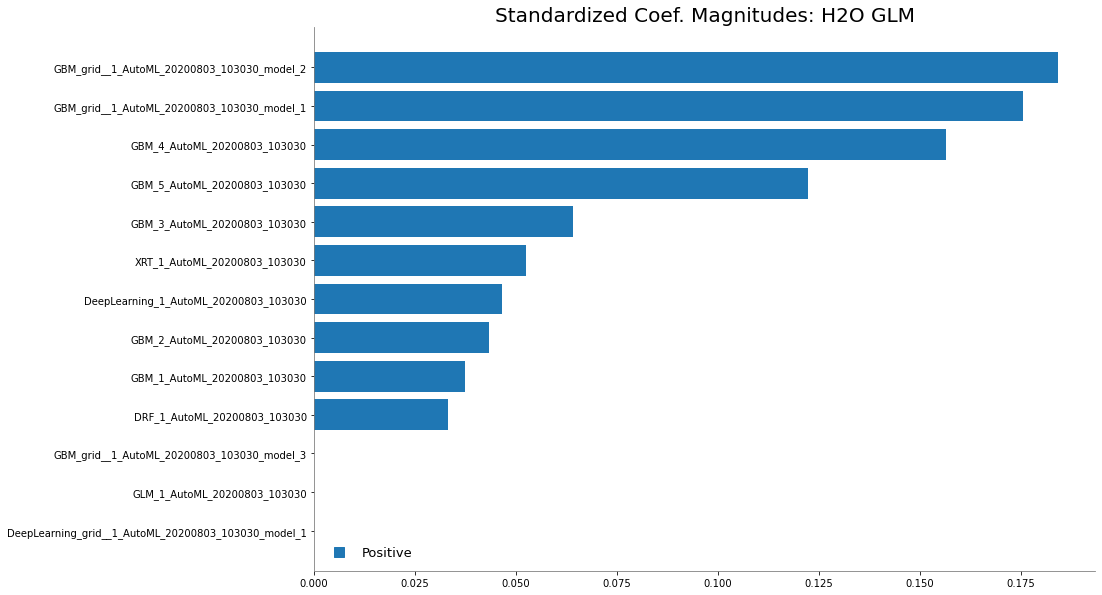

In [72]:
## Check the top contributing models in the AML leaderboard
metalearner = h2o.get_model(acc_aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

In [74]:
preds = acc_aml.leader.predict(acc_test)
preds.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p1,p2
1,0.846307,0.153693
1,0.848605,0.151395
2,0.790762,0.209238
1,0.895082,0.104918
1,0.85704,0.14296
1,0.918512,0.0814884
1,0.851515,0.148485
1,0.834317,0.165683
1,0.899194,0.100806
1,0.84033,0.15967


It seems the first 5 models in autoML are all GBMs!! Not entirely unexpected..Let's move on.

# Conclusion

That's it! We reached the end of our exercise.

Given the model accuracy and performance and the availability of any other benchamraking algorithm available to solve this problem we can use this model to predict if a Policeman will attend an accident event but there is a lot to be desired in terms of improving this model. At best we are still only about 67% accurate in predicting if a policeman would arrive at the scene of an accident or not.

Given I had less than 1 day to work on this model(due to weekend a long list of personal/household errands to run), if given more time and resources I would like to do the following:

1) Better data exploration. Correlation analysis between continous and categorical variables.
2) Given the problem is an unbalanced classification problem (81% vs. 19% for each class) I would like to try stratification while splitting into test and train datasets (it came as an afterthought as in very easy to do).
3) Given about 25 variables out of the 32 in the dataset were categorical, I would like to also try CatBoost algorithm.
4) While using the h2o package I checked and couldn't find XGBoost algorithm available. I would like to try that as well.
5) Add more graphs, check for how the predictions vary by some of the variables like accident severity, number of vehicles, number of casualties etc. May be use partial-dependancy plots.

I would like to thanks Sathish Maruvada and Vinod Iyenger for giving me this opportunity and I look forward to talking to the rest of the team.

Thanks,

-Arun

